<a href="https://colab.research.google.com/github/kostkalab/mol-evol_notebooks/blob/main/lecture_mol_evol_03_22_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Continous time Markov chain (CTMC)

Our current model is using discrete time steps, where transition probabilities are defined by the transition matrix $P$:

$$
\begin{aligned}
&P(X_t = j  | X_{t-1} = i) = P_{ij} &\text{one step transition}\\
&P(X_t = j | X_0 = i) = (P)^t_{ij}\; \text{with}\; t=1,2,3,\ldots &\text{multi-step transition}
\end{aligned}
$$

In the following we will generalize this model for continous times.

## Rate Matrix $Q$

We have seen in the lecture that we can define such a CTM by a ($4\times 4$) rate matrix (denoted by $Q$), defined as follows:

$$
\begin{aligned}
\frac{d}{dt} P(t)_{ij} = \sum\nolimits_kP(t)_{ik}Q_{kj} 
\end{aligned}
$$

Or, equivalently, via the matrix exponential as

$$
P(t) = \text{expm}\big(Qt\big)
$$

Some important take aways are:

- Since $Q$ determines $P(t)$ it governs the substitution process.
- $Q$ does not change over time (in our *stationary* models). If we specify $Q$ we have parameterized our model completely.
- Therefore, to describe different substitution models, researchers parameterize the rate matrix. 
- Key quantities of the substitution process follow directly from the rate matrix.

**Interpretation of rate matrix entries**

- $Q_{ij}\geq 0 \; \text{for} \; i \neq j$: How "quickly" ($\rightarrow$ *rate*) does the transition from $i$ to $j$ happen? "Pressure" to leave state $i$ for state $j$.
- $Q_{ii} \leq 0$: The "pressure" ($\rightarrow$ *rate*) for transitioning away for state $i$.
- The rate of "going away" from state $i$ is the sum of the rates of $i$ transitioning into other states $j \neq i$.
$$-Q_{ii} = \sum\nolimits_{k\neq i} Q_{ik} $$

Key quantities of the substitution process follow directly from the rate matrix:

## Equilibrium distribution

At equilibrium, probabilities of sampling a nucleotide (or "state") don't change:

$$
\sum\nolimits_k \pi_k Q_{ki} = \sum\nolimits_{k\neq i}\pi_k Q_{ki} + \pi_i Q_{ii} =0
$$
Where the first term (in the middle expression) is the rate of nucleotides joining state $i$, whereas the second term is the rate of nucleotides leaving state $i$.

This means that $\pi$ is a left eigenvector of $Q$ with eigenvalue zero. That is $Q$ determines equlibrium frequencies (as expected). 


Since $P(t) = \text{expm}(Qt) = \mathbb{1} + \sum_n \frac{1}{n!}Q^nt^n$ it follows for the transition probabilities:

$$
\sum\nolimits_k \pi_k P_{ki} = \pi_i
$$

That is because above in the matrix exponential only the $\mathbb{1}$ contributes, the powers of $Q$ all amount to zero.

This means that $\pi$ is a left eigenvector of $P$ with eigenvalue one, as we already know from the previous lecture.

## Expected number of substitutions

A key quantity of interest is the expected number of substitutions (for a given choice of the time parameter $t$); for exapmle, think about saturation. Let $n(t)$ the the number of stubsitutions that occur until time $t$. Importantly, this includes "back-substitutions" of the type $i\rightarrow j \rightarrow i$ that would not be observed in measures of sequence divergence ($\rightarrow$ *saturation*). From the rate matrix we get directly

$$
E[n(t)] = -\sum_k \pi_k Q_{kk} t
$$

Where $E[\;]$ denotes the expectation. You can think about it as "running" many processes (which all may have different numbers of (unobserved) substitutions) and then taking the avarage. 

We see that $E[n(t)]$ is a linear function of $t$.

To see how the formula comes along, assume that the time interval $[0,t]$ is divided into $n$ equal-size sub-intervals of size $t/m$:
```
|-----------------------|---> time
0                       t

|-|-|-|...--------------|---> time
0 t                     t
  -
  m
```

Then for each small interval the transition matrix is $P(t/n)$ and we can approximate it for small $t/n$ with the Taylor expansion:
$$
\begin{aligned}
P(t/m)_{ij} &= \mathbb{1}_{ij} + \frac{d}{dt}P(t)_{ij}\big|_{t=0}  \frac{t}{m} + \mathcal{o}(t^2/m^2) \\
&= \mathbb{1}_{ij} + Q_{ij}\frac{t}{m}
\end{aligned}
$$
So that for each small intervall the probability of observing a substitution (i.e., $i\neq j$) is $Q_{ij}\frac{t}{m}$. Phrasing that in terms of the number of substitutions $n$ we have for each small interval:
$$
\text{Pr}_{t/m}[n_{i\rightarrow j}=1] = \pi_i Q_{ij}\frac{t}{m}
$$
And we can sum up over substitution types:
$$
\begin{aligned}
\text{Pr}_{t/m}[n_{i\rightarrow} = 1] &=\sum\nolimits_j \pi_i Q_{ij} \frac{t}{m}\\
&= -\pi_i Q_{ii}\frac{t}{n} \\
\text{Pr}_{t/m}[n= 1] &=- \sum\nolimits_i\pi_iQ_{ii} \frac{t}{m}
\end{aligned}
$$
And for the expecteation of $n$ over the whole time period $t$ we get
$$
\begin{aligned}
E[n(t)] &= \sum_n n \text{Pr}(n)\\
 &\approx \sum_{k=1}^m \text{Pr}_{t/m}[n=1]\cdot 1 \\
 &= -m \sum\nolimits_i\pi_i Q_{ii} \frac{t}{m} \\
 &= -\sum\nolimits_i\pi_i Q_{ii}t
\end{aligned}
$$

**Scaling of the substitution matrix for unit time**

We see from the equation above that multiplying $Q$ by a constant changes substitution rates (for the same $%$). Equivalently, only the product $Qt$ does have meaning. Therefore, $Q$ can be normalized such that $t$ directly indicates the expected number of substitutions by setting that for $t=1$:

$$
-\sum_k \pi_k Q_{kk} = 1
$$


## Time reversibility

Time reversible models are a subclass of substitution models we discussed. For these models "time works the same in both directions". Specifically, that means that:

$$
\pi_iP(t)_{ij} = \pi_jP(t)_{ji}
$$

The probability of bein in $i$ and going from $i$ to $j$ (say, forward in time) is the same as the probability of being in $j$ and going from $j$ to $i$ (say, backward in time). The same holds for the rate matrices:

$$
\pi_i Q_{ij} = \pi_j Q_{ji}
$$

From which then the equation involving transition probabilities follows. For time reversible models the following are equivalent:

$$
\begin{aligned}
\sum\nolimits_k \pi_k P(t1)_{ki} P(t_2)_{kj} & =  \sum\nolimits_k \pi_i P_{ik}(t_i)P_{kj}(t_2) \\
&= \pi_i P(t_1+t_2)_{ij} \\
&= \pi_j P(t_1+t_2)_{ji} 
\end{aligned}
$$

This is the reason the likelihood in our example from last lecture was not well determined and we could only see the correct sum of time steps, but not determine $t_1$ and $t_2$ individually.

## Parameterization of the rate matarix

A commonly used parameterization for all time-reversible models for the rate matrix is

$$
Q = \left(\begin{array}{cccc}
-         & a \,\pi_c& b \,\pi_g & c \,\pi_t\\
a \,\pi_a & -        & d \,\pi_g & e \,\pi_t\\
b \,\pi_a & d \,\pi_c& -         & f \,\pi_t\\
c \,\pi_a & e \,\pi_c& f \,\pi_g & - \\
\end{array}\right)
$$

Where the exchangeability parameters $\{a,b,c,d,e\}$ are non-negative and scaled such that $\sum_i \pi_i Q_{ii} = 1$ (see above).

Note, this parameterization answers our previous question of how to design a process where the equilibrium frequencies are different from q all being $1/4$. 

Some parameterization of the rate matrix have names. The above (most general one) is called **g**eneral **t**ime **r**eversible model (GTR). 

- Jukes Cantor model:
  $$
  \begin{aligned}
  a=b=c=d=e=f=:\mu\\
  \pi_a = \pi_c = \pi_g = \pi_t = 1/4
  \end{aligned}
  $$
  And we can fix $\mu$ by scaling $Q$ such that $E[n(t=1)] =1$:
  $$
  \frac{3}{4}\mu \,4 = 1 \;{\leftrightarrow} \; \mu = \frac{1}{3}
  $$
  So that we get
  $$
  Q_{i\neq j} = \frac{1}{12}
  $$
  And there is no free parameter in the substitution matrix, just the time $t$.
- Two parameter model: Distinguish 
  - Transversions: $Q_{AC} = Q_{CA}= Q_{AT} = Q_{TA} = Q_{CG} = Q_{GC} = Q_{GT} = Q_{TG} = a$
  - Transitions: $Q_{AG}=Q_{GA}=Q_{CT}= Q_{TC} = b$
  
  From scaling we get:
  - $a \in [0, \frac{1}{8}]$
  - $b = \frac{1}{4} - 2a \; \in \; [0, \frac{1}{4}]$
 
 And for equilibrium frequencies we get $\pi_i = 1/4$

# Simulating alignments with `rphast`

The `rphast` package provides functionality for simulating alignments and performing maximum likelihood estimation of substitution model parameters (amongst other things).


## First, we install the rphast package:

In [ ]:
devtools::install_github("CshlSiepelLab/RPHAST")
library(rphast)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpUMGUuF/remotes8a4e738ba8/CshlSiepelLab-RPHAST-2b68f4c/DESCRIPTION’ ... OK
* preparing ‘rphast’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* running ‘cleanup’
* checking vignette meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rphast_1.6.11.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Estimating branch lengths on a species tree

We download an actual, fitted nucleotide substitution model from the UCSC genome browser:

In [ ]:
modfilename="http://hgdownload.soe.ucsc.edu/goldenPath/hg38/phastCons7way/hg38.phastCons7way.mod"
download.file(url=modfilename,destfile="./7way.mod")
mod = read.tm("./7way.mod") # <<- mod contains tree-model (tm)
print(mod)

ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -16383708.873581
BACKGROUND: 0.211867 0.322407 0.234085 0.231641 
RATE_MAT:
  -1.104985    0.272548    0.597439    0.234998 
   0.179103   -0.867492    0.187269    0.501120 
   0.540735    0.257927   -0.986406    0.187744 
   0.214939    0.697481    0.189725   -1.102144 
TREE: (((((hg38:0.00673596,panTro4:0.00686169):0.0248146,rheMac3:0.0357598):0.0970072,(mm10:0.081661,rn5:0.0874126):0.246527):0.0264964,canFam3:0.156769):0.303241,monDom5:0.303241);


We can visualize the rate matrix:

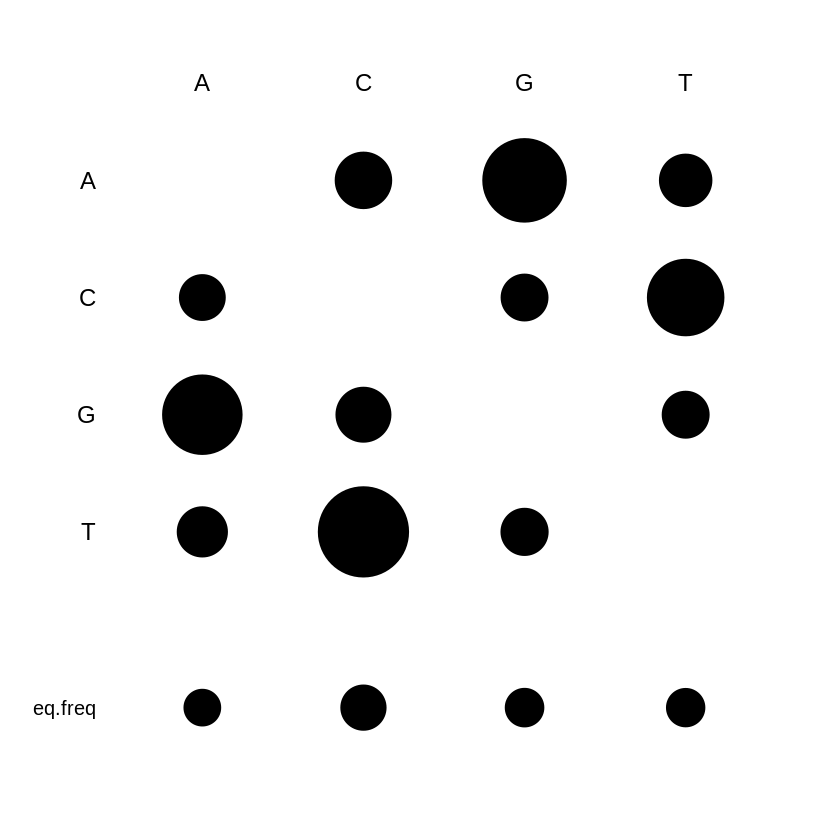

In [ ]:
plot(mod)

We can visualize the species tree:

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pixmap’, ‘sp’, ‘RcppArmadillo’




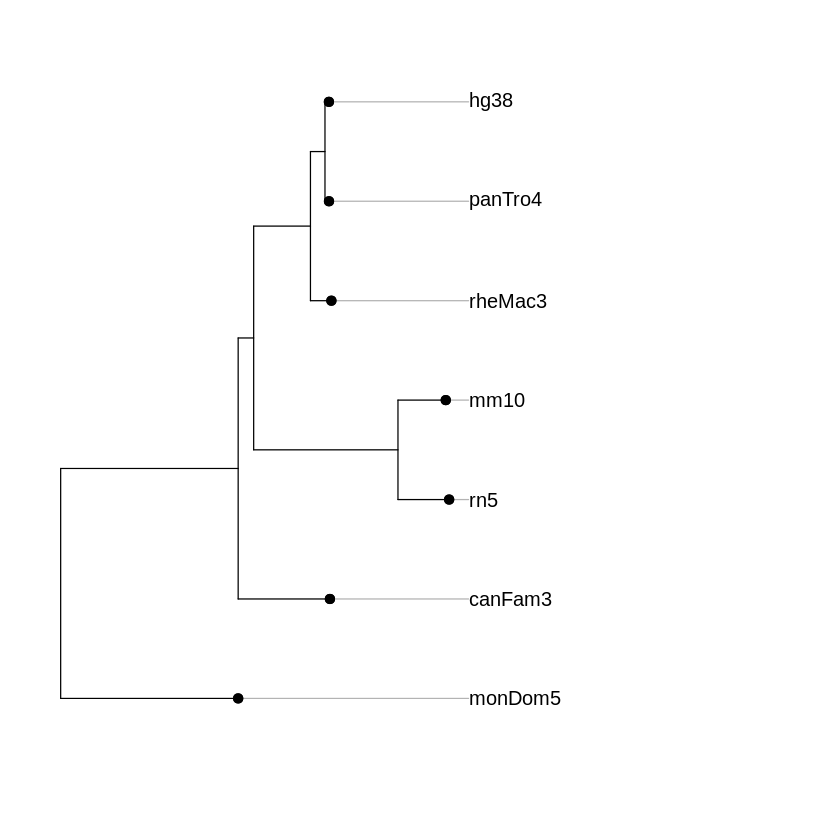

In [ ]:
install.packages('ade4')
plot(ade4::newick2phylog(mod$tree))

We can extract the human branch length from the (fitted) model:

In [ ]:
mod$tree |> summary.tree()                 |> 
             dplyr::filter(name == "hg38") |> 
             dplyr::select(tparent)

tparent
<dbl>
0.00673596


We will now perform the following experiment:

1) Sample alignment of length $l$ from the model we downloaded (after pruning it to contain only primates and rodents)

2) Fit a maximum likelihood GTR model to re-estimate parameters (we know the truth)

3) Extract the estimated human branchlength

We will do that many times and visualize the distribution of estimated branch lengths.

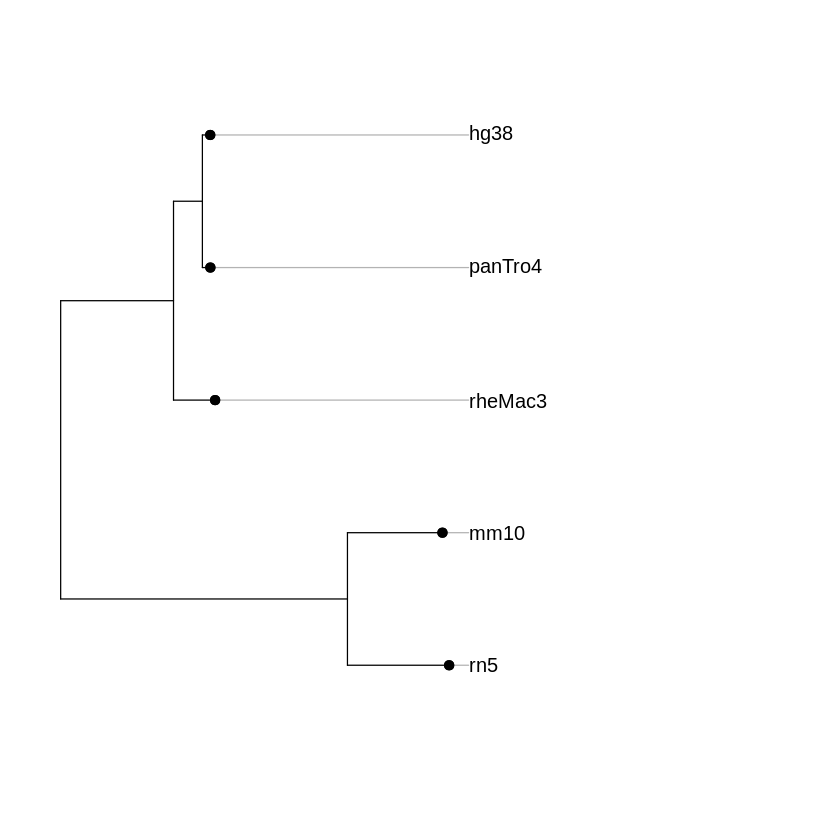

In [ ]:
#- pruning step
p_mod = mod; p_mod$tree = prune.tree(p_mod$tree,seqs=c("canFam3","monDom5"))
plot(ade4::newick2phylog(p_mod$tree))



In [ ]:
#- simulate alignment (of length 55)
sim.msa = simulate.msa(p_mod, nsim=55)
print(sim.msa$seq)

[1] "CACAGTGATTTTGCCGAAGGCGAATCGACGCACCCGTTGTGAATTCACCACAACC"
[2] "CACAGTGATTTTGCCGAAGGCAAATCGACGCACCCGTTGTGAATTCACCACAACC"
[3] "CACAGTGATTTTGCCGAAGGCAAATCGACGCACCCATCGGGAATTCACCACAACC"
[4] "CACACTGCTTTTGCCGGTGGCAGGCTCAAGCTCCCATTGCAGATTAACCACAACC"
[5] "CACTCTGATTTTGCCGAAGGCAGGCTCAAGCTCCCGTCGCGGATTAACGACAACC"


In [ ]:
#- re-fit the model
f_mod = phyloFit(sim.msa,tree=p_mod$tree) 
f_mod

ALPHABET: A C G T 
ORDER: 0
SUBST_MOD: REV
TRAINING_LNL: -168.004910
BACKGROUND: 0.269091 0.323636 0.210909 0.196364 
RATE_MAT:
  -1.155351    0.210896    0.702716    0.241739 
   0.175351   -0.696960    0.193952    0.327656 
   0.896569    0.297617   -1.290407    0.096222 
   0.331272    0.540026    0.103350   -0.974648 
TREE: (((hg38:0.0182545,panTro4:1.74722e-16):4.36806e-17,rheMac3:0.0576949):0.127805,(mm10:0.101114,rn5:0.0605645):0.127805);

In [ ]:
#- extract human branch length
bl <- f_mod$tree                    |> 
      summary.tree()                |> 
      dplyr::filter(name == "hg38") |> 
      dplyr::select(tparent)

print(bl)

    tparent
1 0.0182545


Now we put this together into a convenient function and perform our experiment:

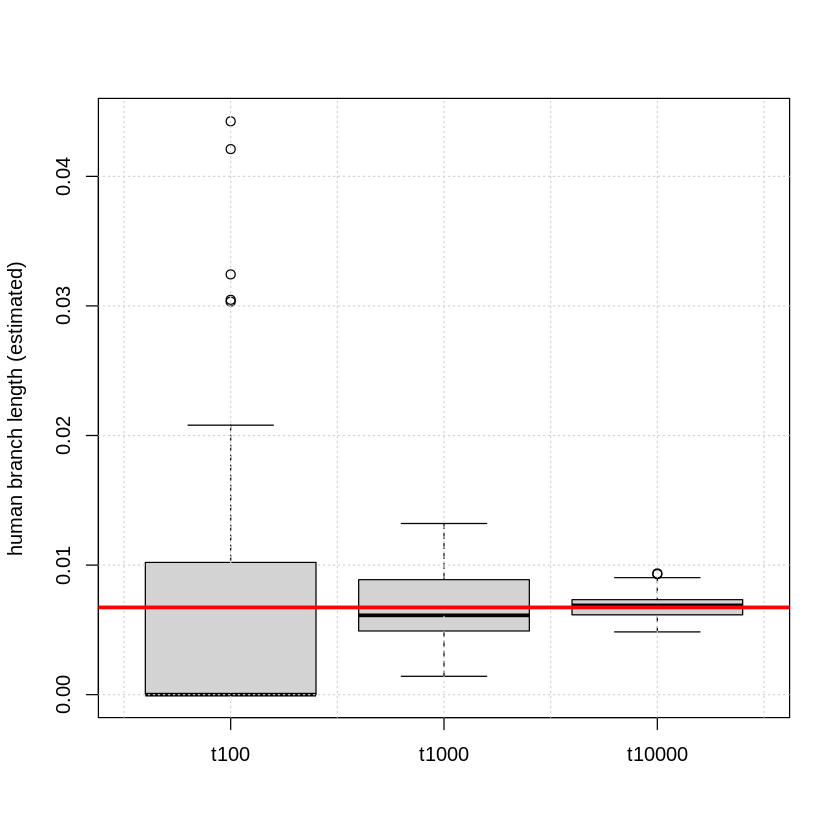

In [ ]:
#- function for simulating an alignment
#  and extracting the human branch length
getTime <- function(alen){   
  #- simulate alignment
  ma = simulate.msa(p_mod,nsim=alen)  
  #- re-fit model
  md = phyloFit(ma,tree=p_mod$tree) 
  #- grab a parameer of interst (could keep all!)
  st <- summary.tree(md$tree)
  return(st[which(st$name == "hg38"), "tparent"])}

#- get 100 estimates for each alignment length
t100   <- replicate(100, getTime(100))
t1000  <- replicate(100, getTime(1000))
t10000 <- replicate(100, getTime(10000))
boxplot(cbind(t100, t1000, t10000), ylab = "human branch length (estimated)")
grid()
abline(h = 0.00673596, col="red", lwd=3)

There are better ways to plot this result:

In [ ]:
library(ggplot2)
install.packages('ggbeeswarm')
library(ggbeeswarm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘beeswarm’, ‘vipor’




,t100,t1000,t10000
,<dbl>,<dbl>,<dbl>
1,1.65481e-16,0.00208314,0.00484479
2,1.01833e-02,0.00600927,0.00671983
3,2.02862e-16,0.00390576,0.00714724
4,2.02918e-02,0.00172809,0.00704369
5,1.05455e-02,0.00407150,0.00648244
6,3.04726e-02,0.00695047,0.00727629


length,time
<chr>,<dbl>
t100,1.65481e-16
t1000,2.08314e-03
t10000,4.84479e-03
t100,1.01833e-02
t1000,6.00927e-03
t10000,6.71983e-03


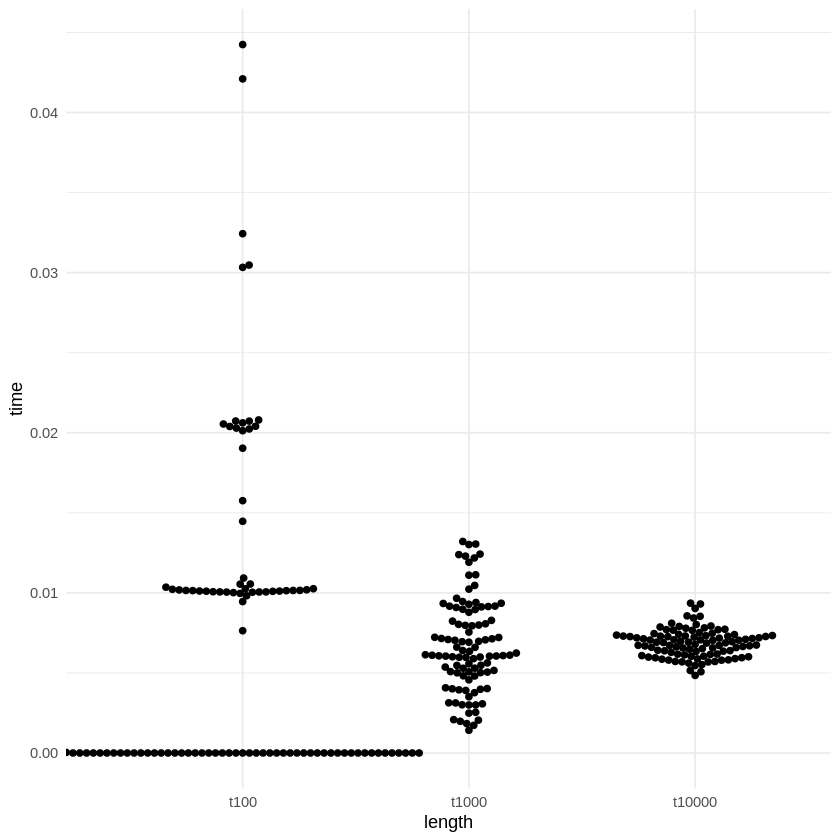

In [ ]:
df = data.frame(t100, t1000, t10000)
df |> head()
df <- df |> tidyr::pivot_longer(everything() ,names_to = 'length', values_to = 'time')
df |> head()
ggplot(df, aes(x=length, y=time)) + geom_beeswarm() + theme_minimal()